In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import brentq

In [2]:
def get_incident_angle(lat,z0, n,R, h, delh):
    z2r = np.arcsin(R * np.sin(z0)/(R + h + delh))
#     zir = np.arcsin(R/(R+h) * np.sin(z0)/n)
#     print(R/(R+h) * np.sin(z0)/n, "f/n crit")
    theta1 = z0 - np.arcsin(R/(R+h) * np.sin(z0))
    theta2 = np.arcsin(R/(R+h) * np.sin(z0) / n) - np.arcsin(R/(R+h+delh) * np.sin(z0) / n)
#     print(lat,theta1, theta2, z2r)
    return lat - z2r - theta1 - theta2

In [3]:
def solve_z(z0,decl,lat, n,R, h, delh):
    z2r = np.arcsin(R * np.sin(z0)/(R + h + delh))
    theta1 = z0 - np.arcsin(R/(R+h) * np.sin(z0))
    theta2 = np.arcsin(R/(R+h) * np.sin(z0) / n) - np.arcsin(R/(R+h+delh) * np.sin(z0) / n)
    return lat - z2r - theta1 - theta2 - decl
    

In [69]:
lat=45
R=6000
h=300
delh=60
n=0.8
f=R/(R+h)
print(f)
if f>n:
    print("z should be less than equal to ", np.rad2deg(np.arcsin(n/f)))
decl=np.deg2rad(30)
brentq(solve_z,np.deg2rad(-57),np.deg2rad(57),args=(decl,lat,n,R,h,delh))

0.9523809523809523
z should be less than equal to  57.1401196211109


ValueError: f(a) and f(b) must have different signs

In [24]:
lat = np.deg2rad(45)
z = np.deg2rad(np.linspace(0,90,101))
n=0.8
R=6000
h=300
f=R/(R+h)
print(f)
if f>n:
    print("z should be less than equal to ", np.rad2deg(np.arcsin(n/f)))
alpha1 = get_incident_angle(lat,z,n,R,h,100)
alpha2 = get_incident_angle(lat+0.01,z,n,R,h,100)


0.9523809523809523
z should be less than equal to  57.1401196211109


/tmp/ipykernel_73867/2184624311.py:6: RuntimeWarning: invalid value encountered in arcsin
  theta2 = np.arcsin(R/(R+h) * np.sin(z0) / n) - np.arcsin(R/(R+h+delh) * np.sin(z0) / n)


In [21]:
0.001*6300

6.3

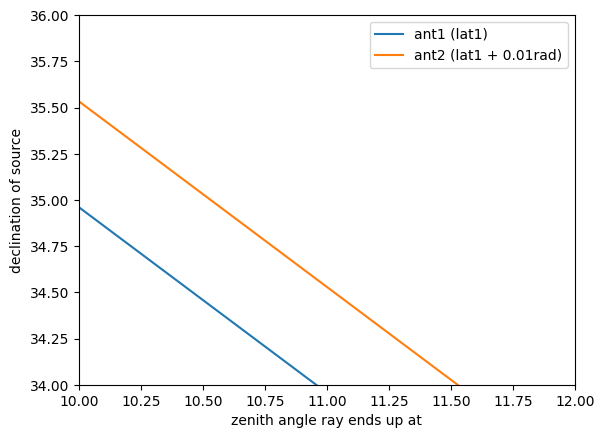

In [27]:
plt.plot(np.linspace(0,90,101),np.rad2deg(alpha1),label='ant1 (lat1)')
plt.plot(np.linspace(0,90,101),np.rad2deg(alpha2), label='ant2 (lat1 + 0.01rad)')
plt.xlim(10,12)
plt.ylim(34,36)
plt.ylabel('declination of source')
plt.xlabel("zenith angle ray ends up at")
plt.legend()

In [75]:
np.rad2deg(alpha1)

106.57115347958035

In [70]:
np.rad2deg(get_incident_angle(lat,np.deg2rad(57),n,R,h,60))

2516.738924609124

In [18]:
np.where(np.isnan(alpha1))

(array([ 64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),)

In [20]:
z[64]

0.9990264638415542

In [19]:
np.where(np.isnan(alpha2))

(array([ 64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),)

In [13]:
np.rad2deg(alpha2)

array([ 46.57520503,  45.66315995,  44.75111534,  43.83906642,
        42.92700837,  42.01493633,  41.10284537,  40.19073045,
        39.2785864 ,  38.36640789,  37.4541894 ,  36.5419252 ,
        35.62960927,  34.71723531,  33.80479669,  32.89228638,
        31.97969691,  31.06702034,  30.15424817,  29.24137128,
        28.32837985,  27.4152633 ,  26.50201014,  25.58860794,
        24.67504314,  23.76130093,  22.84736511,  21.93321789,
        21.01883966,  20.1042088 ,  19.18930135,  18.27409069,
        17.35854718,  16.44263768,  15.52632504,  14.60956744,
        13.69231766,  12.77452215,  11.85611997,  10.93704141,
        10.01720643,   9.09652257,   8.17488253,   7.252161  ,
         6.32821068,   5.40285726,   4.47589277,   3.54706703,
         2.6160761 ,   1.68254681,   0.74601539,  -0.19410247,
        -1.13855472,  -2.08831632,  -3.04468567,  -4.00943616,
        -4.9850652 ,  -5.97522411,  -6.98550927,  -8.0250398 ,
        -9.10995786, -10.27244718, -11.58996564, -13.33

In [ ]:
plt.plot(np.rad2deg(z), np.rad2deg(alpha1))
plt.plot(np.rad2deg(z), np.rad2deg(alpha2))
# plt.ylim(30,31)
# # plt.xlim(24,26)


In [18]:
alpha1

array([ 0.78539816,  0.77142159,  0.75744499,  0.74346835,  0.72949164,
        0.71551484,  0.70153794,  0.6875609 ,  0.6735837 ,  0.65960632,
        0.64562874,  0.63165093,  0.61767286,  0.60369451,  0.58971584,
        0.57573684,  0.56175746,  0.54777768,  0.53379747,  0.51981679,
        0.5058356 ,  0.49185386,  0.47787154,  0.46388858,  0.44990496,
        0.43592061,  0.42193548,  0.40794953,  0.39396269,  0.3799749 ,
        0.36598609,  0.3519962 ,  0.33800514,  0.32401284,  0.3100192 ,
        0.29602413,  0.28202753,  0.26802929,  0.25402928,  0.24002739,
        0.22602346,  0.21201734,  0.19800888,  0.18399789,  0.16998416,
        0.1559675 ,  0.14194765,  0.12792437,  0.11389736,  0.09986633,
        0.08583091,  0.07179074,  0.0577454 ,  0.04369441,  0.02963726,
        0.01557338,  0.00150211, -0.01257726, -0.02666553, -0.04076363,
       -0.05487257, -0.06899353, -0.08312782, -0.09727696, -0.11144268,
       -0.12562697, -0.13983213, -0.15406083, -0.16831621, -0.18

In [19]:
alpha2

array([ 0.79539816,  0.78142159,  0.76744499,  0.75346835,  0.73949164,
        0.72551484,  0.71153794,  0.6975609 ,  0.6835837 ,  0.66960632,
        0.65562874,  0.64165093,  0.62767286,  0.61369451,  0.59971584,
        0.58573684,  0.57175746,  0.55777768,  0.54379747,  0.52981679,
        0.5158356 ,  0.50185386,  0.48787154,  0.47388858,  0.45990496,
        0.44592061,  0.43193548,  0.41794953,  0.40396269,  0.3899749 ,
        0.37598609,  0.3619962 ,  0.34800514,  0.33401284,  0.3200192 ,
        0.30602413,  0.29202753,  0.27802929,  0.26402928,  0.25002739,
        0.23602346,  0.22201734,  0.20800888,  0.19399789,  0.17998416,
        0.1659675 ,  0.15194765,  0.13792437,  0.12389736,  0.10986633,
        0.09583091,  0.08179074,  0.0677454 ,  0.05369441,  0.03963726,
        0.02557338,  0.01150211, -0.00257726, -0.01666553, -0.03076363,
       -0.04487257, -0.05899353, -0.07312782, -0.08727696, -0.10144268,
       -0.11562697, -0.12983213, -0.14406083, -0.15831621, -0.17